Exploratory Analysis:

Intro: The purpose of this analysis is to understand the main trends involving movies genres

Research Questions:

1. Which genres are the most common?
2. Which genres have the highest average budget and revenue?
3. Which genres have high average popularity?
4. Which genres have the highest ranking (imd >=8)?

Research Hypothesis:

1. The best movies according to vote_avg, return high profit and revenue
2. The best movies according to popularity, return high profit and revenue
3. Highly budgeted movies return high revenue and profit?
4. Highly budgeted movies have a high popularity?

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv(r'C:\Users\maxim\OneDrive\Documents\FIU\imdb_movies.csv')
movies = movies[['genres','popularity','budget','revenue','runtime','vote_average']]
movies

,genres,popularity,budget,revenue,runtime,vote_average
0,Action|Adventure|Science Fiction|Thriller,32.985763,150000000,1513528810,124,6.5
1,Action|Adventure|Science Fiction|Thriller,28.419936,150000000,378436354,120,7.1
2,Adventure|Science Fiction|Thriller,13.112507,110000000,295238201,119,6.3
3,Action|Adventure|Science Fiction|Fantasy,11.173104,200000000,2068178225,136,7.5
4,Action|Crime|Thriller,9.335014,190000000,1506249360,137,7.3
...,...,...,...,...,...,...
10861,Documentary,0.080598,0,0,95,7.4
10862,Action|Adventure|Drama,0.065543,0,0,176,5.7
10863,Mystery|Comedy,0.065141,0,0,94,6.5
10864,Action|Comedy,0.064317,0,0,80,5.4


In [110]:
df = movies
df['genres'] = df['genres'].str.split('|')
df_exploded = df.explode('genres')

In [112]:
df_exploded

,genres,popularity,budget,revenue,runtime,vote_average
0,Action,32.985763,150000000,1513528810,124,6.5
0,Adventure,32.985763,150000000,1513528810,124,6.5
0,Science Fiction,32.985763,150000000,1513528810,124,6.5
0,Thriller,32.985763,150000000,1513528810,124,6.5
1,Action,28.419936,150000000,378436354,120,7.1
...,...,...,...,...,...,...
10863,Mystery,0.065141,0,0,94,6.5
10863,Comedy,0.065141,0,0,94,6.5
10864,Action,0.064317,0,0,80,5.4
10864,Comedy,0.064317,0,0,80,5.4


In [10]:
final_table = df_exploded.groupby('genres').mean()
final_table = final_table.reset_index()

In [114]:
genres_count = df_exploded[['genres']].groupby('genres').agg(count = ('genres','count')).sort_values(by = 'count', ascending = False)

Text(0.5, 1.0, 'Most common movie genres')

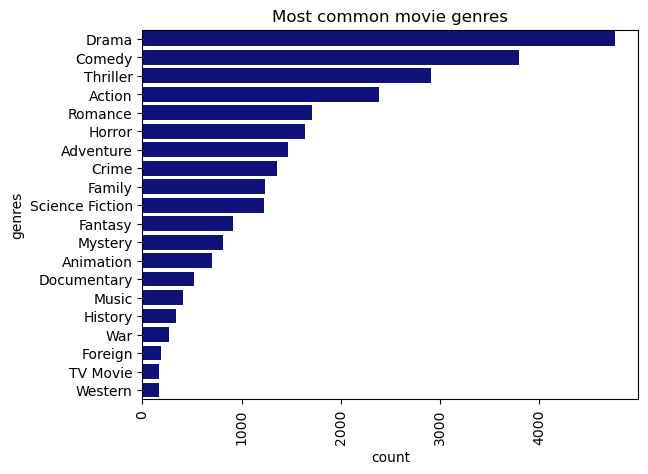

In [120]:
sns.barplot(genres_count, x = 'count', y = 'genres', color = 'DarkBlue')
plt.xticks(rotation=90)
plt.title('Most common movie genres')  

In [124]:
genres_pop = final_table[['genres','popularity']]
genres_pop = genres_pop.sort_values(by = 'popularity', ascending = False)

Text(0.5, 1.0, 'Most popular movie genres')

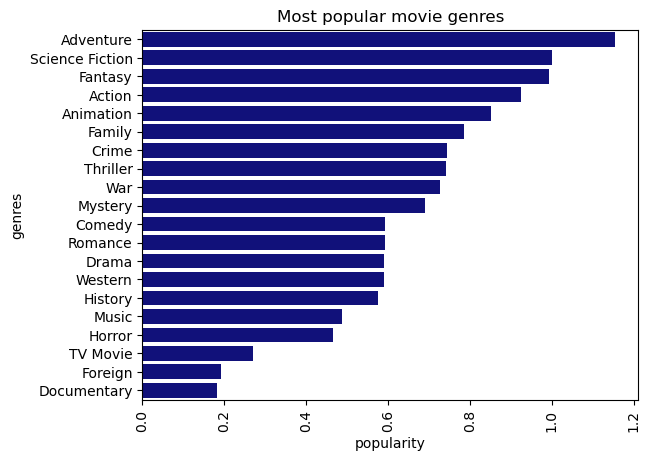

In [126]:
sns.barplot(genres_pop, x = 'popularity', y = 'genres', color = 'DarkBlue')
plt.xticks(rotation=90)
plt.title('Most popular movie genres')  

In [128]:
genres_imdb = final_table[['genres','vote_average']]
genres_imdb = genres_imdb.sort_values(by = 'vote_average', ascending = False)
genres_imdb

,genres,vote_average
5,Documentary,6.908462
12,Music,6.480392
10,History,6.410479
2,Animation,6.403147
18,War,6.297778
6,Drama,6.165301
4,Crime,6.124059
19,Western,6.083030
14,Romance,6.042874
7,Family,5.997563


Text(0.5, 1.0, 'Ranked movie genres in terms of imdb score')

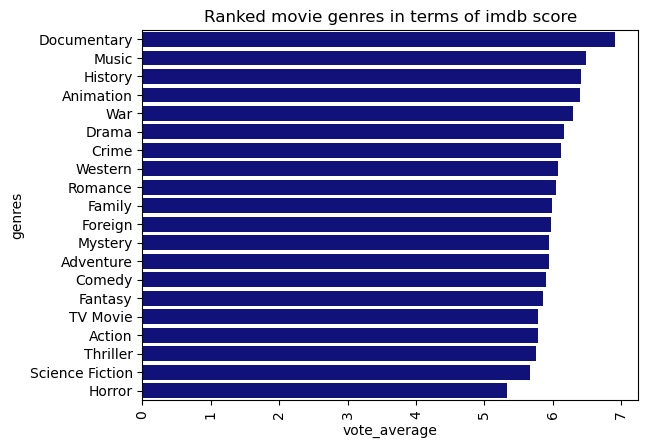

In [130]:
sns.barplot(genres_imdb, x = 'vote_average', y = 'genres', color = 'DarkBlue')
plt.xticks(rotation=90)
plt.title('Ranked movie genres in terms of imdb score')  

Text(0.5, 1.0, 'Budget vs Revenue of movie genres')

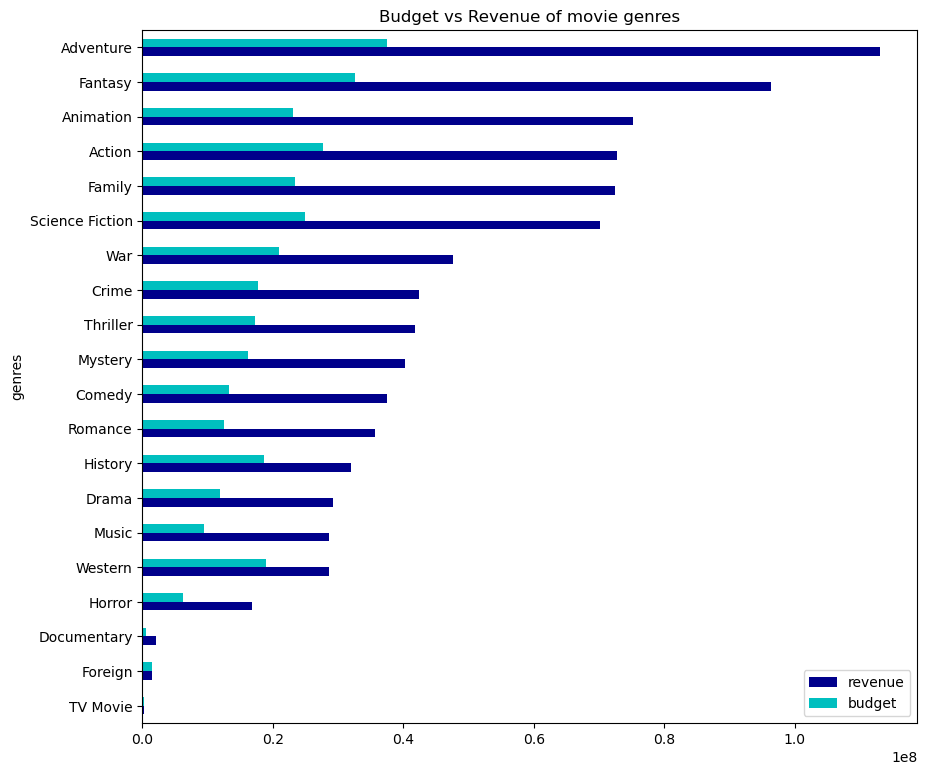

In [132]:
genres_rb = final_table[['genres','revenue','budget']]
genres_rb = genres_rb.sort_values(by = 'revenue', ascending = True)
genres_rb.set_index('genres', inplace=True)
genres_rb.plot.barh(color = ('DarkBlue','c'), figsize = (10,9))
plt.title('Budget vs Revenue of movie genres')  

4. Highly budgeted movies have a high popularity?

In [16]:
movies

,genres,popularity,budget,revenue,runtime,vote_average
0,"[Action, Adventure, Science Fiction, Thriller]",32.985763,150000000,1513528810,124,6.5
1,"[Action, Adventure, Science Fiction, Thriller]",28.419936,150000000,378436354,120,7.1
2,"[Adventure, Science Fiction, Thriller]",13.112507,110000000,295238201,119,6.3
3,"[Action, Adventure, Science Fiction, Fantasy]",11.173104,200000000,2068178225,136,7.5
4,"[Action, Crime, Thriller]",9.335014,190000000,1506249360,137,7.3
...,...,...,...,...,...,...
10861,[Documentary],0.080598,0,0,95,7.4
10862,"[Action, Adventure, Drama]",0.065543,0,0,176,5.7
10863,"[Mystery, Comedy]",0.065141,0,0,94,6.5
10864,"[Action, Comedy]",0.064317,0,0,80,5.4


In [60]:
movies1 = pd.read_csv(r'C:\Users\maxim\OneDrive\Documents\FIU\imdb_movies.csv')
movie = movies1[['popularity','budget','revenue','vote_average']]
movie_filtered = movie[movie['budget'] > 0]

,popularity,budget,revenue,vote_average
0,32.985763,150000000,1513528810,6.5
1,28.419936,150000000,378436354,7.1
2,13.112507,110000000,295238201,6.3
3,11.173104,200000000,2068178225,7.5
4,9.335014,190000000,1506249360,7.3
...,...,...,...,...
10835,0.299911,12000000,20000000,7.0
10841,0.264925,75000,0,5.5
10848,0.207257,5115000,12000000,6.7
10855,0.141026,700000,0,6.1


Text(0.5, 1.0, 'Correlation budget vs popularity')

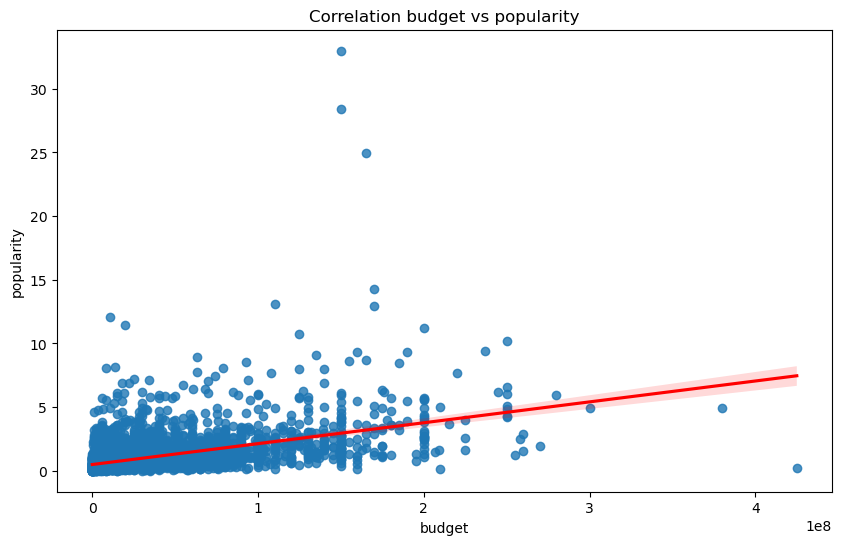

In [134]:
plt.figure(figsize=(10, 6))
sns.regplot(data = movie_filtered, x = 'budget', y = 'popularity', line_kws = {'color':'red'})
plt.title('Correlation budget vs popularity')  

In [58]:
movie_filtered.corr(method = 'spearman')

,popularity,budget,revenue,vote_average
popularity,1.000000,0.534060,0.681218,0.327438
budget,0.534060,1.000000,0.647074,0.043277
revenue,0.681218,0.647074,1.000000,0.285895
vote_average,0.327438,0.043277,0.285895,1.000000


In [62]:
movie_filtered['profit'] = movie_filtered['revenue']-movie_filtered['budget']

C:\Users\maxim\AppData\Local\Temp\ipykernel_27368\3353870826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_filtered['profit'] = movie_filtered['revenue']-movie_filtered['budget']


Text(0.5, 1.0, 'Correlation budget vs profit')

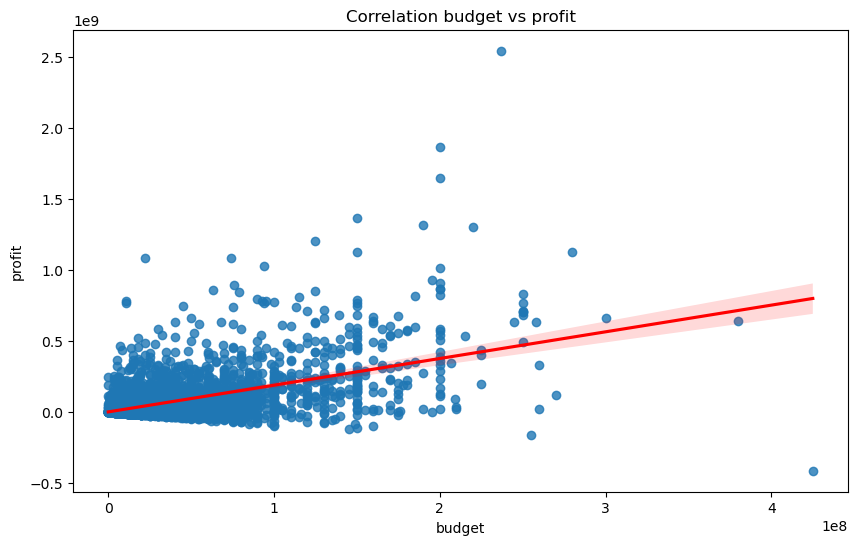

In [136]:
movie_profit = movie_filtered[movie_filtered['revenue']>0]
movie_profit.sort_values(by = 'profit')
plt.figure(figsize=(10, 6))
sns.regplot(data = movie_profit, x = 'budget', y = 'profit', line_kws = {'color':'red'})
plt.title('Correlation budget vs profit')  

Text(0.5, 1.0, 'Correlation budget vs revenue')

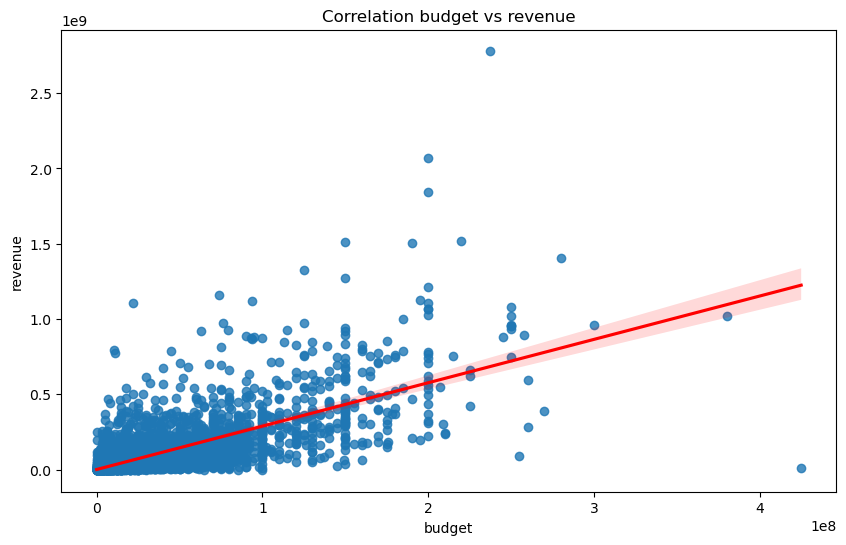

In [138]:
plt.figure(figsize=(10, 6))
sns.regplot(data = movie_profit, x = 'budget', y = 'revenue', line_kws = {'color':'red'})
plt.title('Correlation budget vs revenue')  

1. does the best movies in terms of vote_avg, return high on revenue and profit?

Text(0.5, 1.0, 'Correlation vote_avg vs profit')

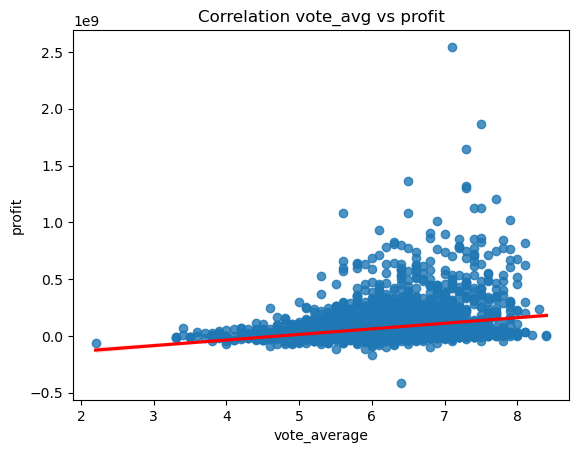

In [140]:
sns.regplot(data = movie_profit, x = 'vote_average', y = 'profit', line_kws = {'color':'red'})
plt.title('Correlation vote_avg vs profit')  

Text(0.5, 1.0, 'Correlation vote_avg vs revenue')

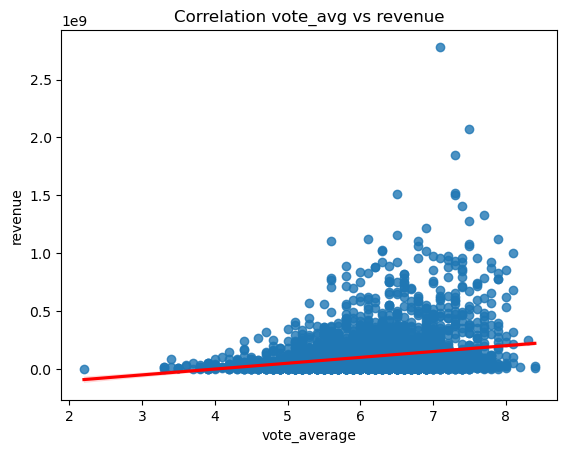

In [142]:
sns.regplot(data = movie_profit, x = 'vote_average', y = 'revenue', line_kws = {'color':'red'})
plt.title('Correlation vote_avg vs revenue')  

In [94]:
movie_profit.corr(method = 'spearman')

,popularity,budget,revenue,vote_average,profit
popularity,1.000000,0.474396,0.653547,0.309659,0.573134
budget,0.474396,1.000000,0.667854,-0.059357,0.311528
revenue,0.653547,0.667854,1.000000,0.194517,0.877265
vote_average,0.309659,-0.059357,0.194517,1.000000,0.286388
profit,0.573134,0.311528,0.877265,0.286388,1.000000


2. does the best movies according to popularity, return high revenue?


Text(0.5, 1.0, 'Correlation revenue vs popularity')

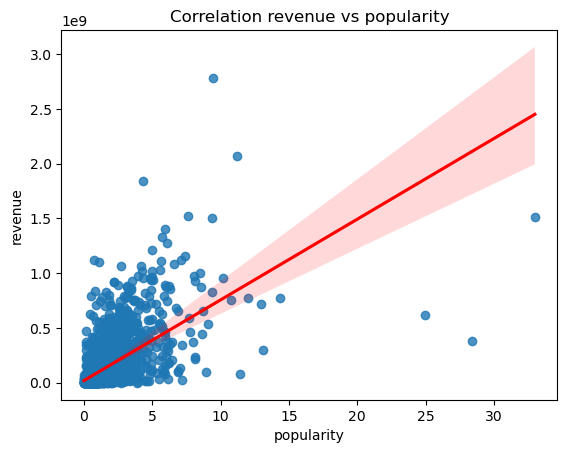

In [144]:
sns.regplot(data = movie_profit, x = 'popularity', y = 'revenue', line_kws = {'color':'red'})
plt.title('Correlation revenue vs popularity')  

In [104]:
movie_profit.sort_values(by = 'revenue')

,popularity,budget,revenue,vote_average,profit
5067,0.462609,6000000,2,6.4,-5999998
8142,0.552091,6000000,2,6.8,-5999998
3239,0.352054,200000,3,7.7,-199997
8523,0.578849,15000000,5,4.9,-14999995
5162,0.208637,10,5,6.8,-5
...,...,...,...,...,...
0,32.985763,150000000,1513528810,6.5,1363528810
4361,7.637767,220000000,1519557910,7.3,1299557910
5231,4.355219,200000000,1845034188,7.3,1645034188
3,11.173104,200000000,2068178225,7.5,1868178225
